## 0. Import required libraries

In [1]:
import geopandas as gpd


## 1. Import U.S. Census data for Hennepin County, MN

In [2]:
gdf = gpd.read_file("mn_2020_census_blocks_hennepin.geojson")


## 2. Define function to build a district using breadth-first search from a given starting block

Inputs:
1. `geodataframe` - the GeoPandas DataFrame that contains all the Census information
2. `current_block` - the Census block that it used to initialize the breadth-first search
3. `dictionary` - a dictionary where the keys are all FIDs, which are unique numeric identifiers that each correspond to one Census block. Tthe values are either 0 or 1, depending on whether the block is part of the district (1) or not (0). This dictionary will be updated while the function runs. Initially, all values are 0 in the dictionary.
4. `population_target` - as soon as the population of the district exceeds this value, the algorithm stops running and returns.
5. `current_population` - a running total of the population of the district as it's being built. The default value for this number is 0 because the district is initially empty, but the number will grow as blocks are added to the district.

In [122]:
def build_district(geodataframe, starting_block, dictionary, population_target, current_population=0):
    queue = []
    queue.append(starting_block)
    dictionary[starting_block.FID] = 1
    
    while current_population < population_target:
        block = queue.pop(0)
        neighbors = geodataframe[geodataframe.geometry.touches(block.geometry)]

        for neighbor in neighbors.itertuples():
            if dictionary[neighbor.FID] == 0:       # if this block is not already in the dictionary, add it
                dictionary[neighbor.FID] = 1
                current_population += neighbor.POPULATION       # update the population of the district
                queue.append(neighbor)

    return dictionary

## 3. Build the dictionary that will assist the above function in building a district

In [124]:
block_dict = {} # keys are FIDs, values are whether this block has been added into a district (1 yes, 0 no)

for block in gdf.itertuples():
    block_dict[block.FID] = 0

## 4. Build the district

In [126]:
result = build_district(gdf, gdf.iloc[0], block_dict, 100000, 0)
print(result)

{17962: 1, 17963: 1, 17964: 1, 17965: 1, 17966: 1, 17967: 1, 17968: 1, 17969: 1, 17970: 1, 17971: 1, 17972: 1, 17973: 1, 17974: 1, 17975: 1, 17976: 1, 17977: 1, 17978: 1, 17979: 1, 17980: 1, 17981: 1, 17982: 1, 17983: 1, 17984: 1, 17985: 1, 17986: 1, 17987: 1, 17988: 1, 17989: 1, 17990: 1, 17991: 1, 17992: 1, 17993: 1, 17994: 1, 17995: 1, 17996: 1, 17997: 1, 17998: 1, 17999: 1, 18000: 1, 18001: 1, 18002: 1, 18003: 1, 18004: 1, 18005: 1, 18006: 1, 18007: 1, 18008: 1, 18009: 1, 18010: 1, 18011: 1, 71077: 0, 71078: 0, 71079: 0, 71080: 0, 71081: 0, 71082: 0, 71083: 0, 71084: 0, 71085: 0, 71086: 0, 71087: 0, 71088: 0, 71089: 0, 71090: 0, 71091: 0, 71092: 0, 71093: 0, 71094: 0, 71095: 0, 71096: 0, 71097: 0, 71098: 0, 71099: 0, 71100: 0, 71101: 0, 71102: 0, 71103: 0, 71104: 0, 71105: 0, 71106: 0, 71107: 0, 71108: 0, 71109: 0, 71110: 0, 71111: 0, 71112: 0, 71113: 0, 71114: 0, 71115: 0, 71116: 0, 71117: 0, 71118: 0, 71119: 0, 71120: 0, 71121: 0, 71122: 0, 71123: 0, 71124: 0, 71125: 0, 71126: 0,

## 5. Plot the district

<Axes: >

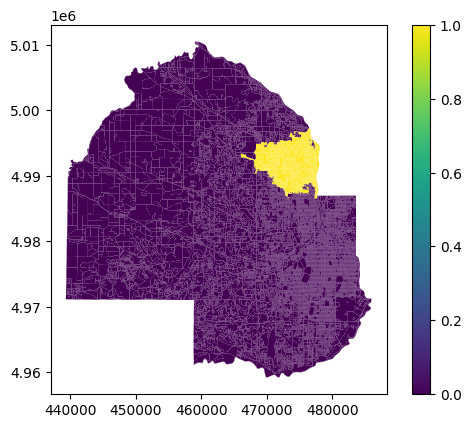

In [128]:
# yellow values (1) are part of the district; purple values (0) are not
gdf.plot(column='district', legend=True)